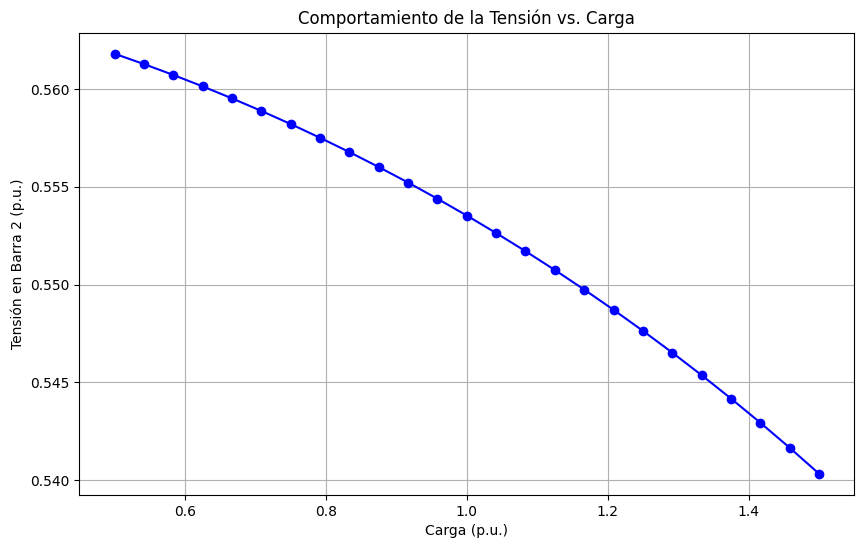

In [5]:
import pandapower as pp
import matplotlib.pyplot as plt
import numpy as np

# Red de referencia
net = pp.create_empty_network()

# Barras
bus1 = pp.create_bus(net, vn_kv=500, name="Bus 1")
bus2 = pp.create_bus(net, vn_kv=500, name="Bus 2")

# Datos de la linea 
length_km = 500  
r_ohm_per_km = 0.02  
x_ohm_per_km = 0.115
c_nf_per_km = 19.1  
max_i_ka = 1

# Lineas de transmisión(Escogido a partir de las especificacones que nos entrega la tarea desde la libreria PandaPower.)
pp.create_line_from_parameters(net, from_bus=bus1, to_bus=bus2, length_km=length_km,
                               r_ohm_per_km=r_ohm_per_km, x_ohm_per_km=x_ohm_per_km,
                               c_nf_per_km=c_nf_per_km, max_i_ka=max_i_ka, name='Línea 1')

# Transformador
pp.create_transformer(net, hv_bus=bus1, lv_bus=bus2, std_type="100 MVA 220/110 kV")

# Barra slack
pp.create_ext_grid(net, bus=bus1, vm_pu=1.0)

# Carga nominal
p_nominal = 1080  # MW
q_nominal = 523.068   # MVAr
s_nominal = complex(p_nominal, q_nominal) #MVA

# Rango de carga ±50%
p_values = np.linspace(0.5 * p_nominal, 1.5 * p_nominal, 25)
voltages = []

# Simular para cada valor de carga
for p in p_values:
    pp.create_load(net, bus=bus2, p_mw=p, q_mvar=q_nominal)
    pp.runpp(net)
    voltages.append(net.res_bus.vm_pu[bus2])
    net.load.drop(net.load.index, inplace=True)  # Resetear las cargas para la próxima simulación

# Graficar los resultados
plt.figure(figsize=(10,6))
plt.plot(p_values / p_nominal, voltages, 'bo-')
plt.title('Comportamiento de la Tensión vs. Carga')
plt.xlabel('Carga (p.u.)')
plt.ylabel('Tensión en Barra 2 (p.u.)')
plt.grid()
plt.show()